# III. 🤖 Model Building

Predicting the salary based on job state, company rating, company industry and other variables.

#### Importing essential librairies

In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,data engineer,na,"['sql', 'java', 'python']",[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,4.0,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,data engineer,na,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,data engineer,na,"['sql', 'python']","['databricks', 'aws']",[],[],['spark'],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",111739,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,data engineer,na,['python'],[],['tableau'],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,data engineer,na,['sql'],[],['tableau'],['oracle'],[],[],bachelor,5-10 years


#### Feature Engineering

Making a new dataframe with relevant features for the regression model

In [57]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,CA,na,NaN,0-2 years,Information Technology Support Services,4.7,70000
1,MS,na,bachelor,2-5 years,NaN,4.0,76500
2,Remote,na,master,0-2 years,Biotech & Pharmaceuticals,4.4,121500
3,CA,na,NaN,NaN,Computer Hardware Development,4.2,111739
4,MD,na,bachelor,5-10 years,NaN,5.0,117000


Dropping some states and company industries that have below 5 data points.

In [58]:
jobstate_count = df_model['job_state'].value_counts()
jobstate_count

Remote          81
TX              58
CA              32
GA              26
NJ              22
MA              18
NY              17
VA              16
DC              15
IL              14
FL              13
NC              13
PA              10
MN              10
CO               9
OH               8
WI               7
OR               6
MD               6
DE               4
TN               4
SC               4
WA               4
UT               3
Minnesota        2
California       2
AR               2
Pennsylvania     2
AZ               2
MI               2
MO               2
MS               2
ME               1
IN               1
Texas            1
Manhattan        1
AL               1
KY               1
NE               1
Illinois         1
Oregon           1
KS               1
CT               1
OK               1
Ohio             1
Name: job_state, dtype: int64

In [59]:
states_g5 = jobstate_count[jobstate_count > 5].index.tolist()

df_model = df_model[df_model["job_state"].isin(states_g5)]
df_model['job_state'].value_counts()

Remote    81
TX        58
CA        32
GA        26
NJ        22
MA        18
NY        17
VA        16
DC        15
IL        14
NC        13
FL        13
MN        10
PA        10
CO         9
OH         8
WI         7
MD         6
OR         6
Name: job_state, dtype: int64

One Hot Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([ 0, 15,  7,  6,  4, 16,  8, 11, 17, 10,  2, 18,  5, 13, 14, 12,  1,
        9,  3])

In [63]:
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [64]:
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 1, 0])

In [65]:
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([28,  7, 14, 53, 27, 31, 26, 15, 32,  0,  9, 20, 21, 45,  5, 50,  3,
       44, 36,  2, 43,  6, 38, 22, 19,  1, 52, 17, 33, 16, 13, 40, 37, 39,
       47, 18, 35, 49, 11, 34, 41, 51, 25, 29, 23, 30, 46, 12, 24,  8, 10,
       42,  4, 48])

In [66]:
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1. , 2. , 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4,
       3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
       4.8, 4.9, 5. ])

In [67]:
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([25, 22, 20, 28,  5, 16, 26, 19,  0,  9, 13, 18, 23, 21, 10,  4, 14,
       27,  6, 17, 24, 15, 12,  8, 11,  1,  7,  3,  2], dtype=int64)

In [68]:
le_exp = LabelEncoder()
df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 4, 3, 0, 2])

In [69]:
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,0,0,2,1,28,25,70000
2,15,0,1,1,7,22,121500
3,0,0,2,4,14,20,111739
4,7,0,0,3,53,28,117000
5,6,0,0,0,27,5,94536


<Axes: >

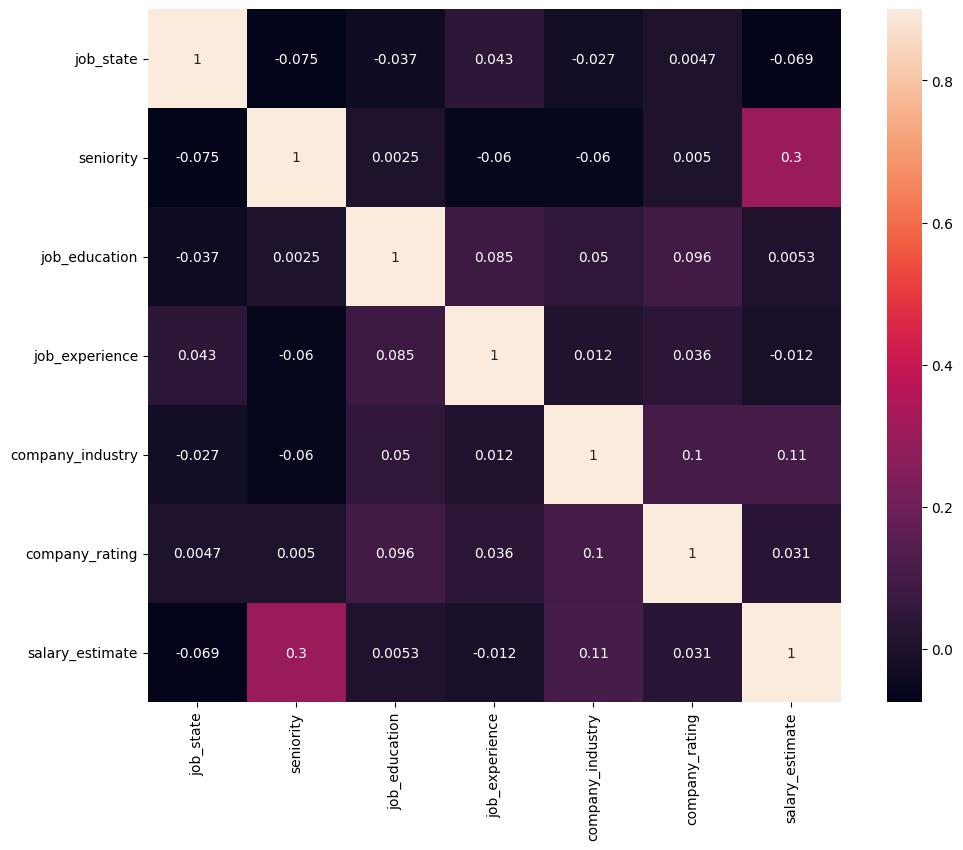

In [70]:
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the job experience needed and the job state.

### Multiple Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
model = LinearRegression()

In [75]:
model.fit(X_train, y_train)

LinearRegression()

In [76]:
predictions = model.predict(X_test)

In [77]:
print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, predictions), 2)}')

Mean Absolute Error : $14728.19


In [78]:
error = np.sqrt(mean_squared_error(y_test, predictions))
print("Error : ${:,.02f}".format(error))   

Error : $19,424.66


### Random Forest Regressor Model

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [81]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [82]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, y_pred), 2)}')
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error))    

Mean Absolute Error : $16326.93
Error : $21,866.75


In [83]:
errors = abs(y_pred - y_test)

In [84]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 83.15 %


Training the model on all the dataset so we can export it and use it in production

In [92]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=6, random_state=0)

Variable Importances

In [96]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: job_state            Importance: 0.25
Variable: company_industry     Importance: 0.23
Variable: company_rating       Importance: 0.2
Variable: seniority            Importance: 0.17
Variable: job_experience       Importance: 0.1
Variable: job_education        Importance: 0.06


[None, None, None, None, None, None]

Let's test our model on an example

In [97]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [98]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 0.,  1.,  0.,  1., 28., 23.]])

In [102]:
y_pred = regressor.predict(X_example)
y_pred[0]

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


126070.92694738705

For a senior data engineer who's looking to work in California (CA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $126,070 /year.

Exporting the model to a pickle file

In [99]:
import pickle

data = {"model": regressor, "le_state": le_state, "le_sen": le_sen, "le_edu": le_edu, "le_exp": le_exp, "le_indu": le_indu, "le_rating": le_rating}

with open('../models/model_salary_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

Let's test our model after importing it from the pickle file

In [100]:
with open('../models/model_salary_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [101]:
y_pred = regressor_loaded.predict(X_example)
y_pred[0].round()

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


126071.0